In [1]:
#We run Our Imports 

In [1]:
import torch
import torch.nn as nn
import torchvision 
import torchvision.transforms as transforms
from torchvision import datasets
import numpy as np
import matplotlib.pyplot as plt
import PIL.Image as image

In [2]:
#We define our Image transform parameters
#Our mean and Standard deviation Was derive Manually not estimated
our_transforms = transforms.Compose([transforms.Resize((224,224)),
                                     transforms.ToTensor(),
                                     transforms.Normalize([0.6788, 0.6414, 0.6606], [0.2580, 0.2576, 0.2550])
                                    ])

In [3]:
#We load our Image Data

In [4]:
train_datasets = datasets.ImageFolder(root = 'C:/Users/user pc/Desktop/ML_DEEP/DEEP/BloodCell Classification/dataset2-master/dataset2-master/images/TRAIN',
                                      transform = our_transforms)
test_datasets = datasets.ImageFolder(root = 'C:/Users/user pc/Desktop/ML_DEEP/DEEP/BloodCell Classification/dataset2-master/dataset2-master/images/TEST', 
                                     transform = our_transforms)

In [5]:
train_loader = torch.utils.data.DataLoader(train_datasets, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_datasets, batch_size=32, shuffle=False)

In [6]:
#Our Convoluted Neural Network
class Bloodconv(nn.Module):
    def __init__(self):
        super(Bloodconv,self).__init__()
        self.Con1 = nn.Conv2d(3, 6, 5)
        self.Pool = nn.MaxPool2d(2,2)
        self.Con2 = nn.Conv2d(6, 16, 5)
        self.FC1  = nn.Linear(16*53*53, 120)
        self.FC2  = nn.Linear(120, 84)
        self.FC3 = nn.Linear(84, 4)
        
    def forward(self,x):
        x = self.Con1(x)
        x = self.Pool(x)
        x = self.Con2(x)
        x = self.Pool(x)
        x = x.view(-1, 16*53*53)
        x = self.FC1(x)
        x = self.FC2(x)
        x = self.FC3(x)
        
        return x

In [7]:
#We define some required parameters
#Loss, oOptimizer,to_device if we have cuda installed, and then we run our model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = Bloodconv().to(device)
our_loss = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)


In [8]:
#Our model training over 3epochs
num_epochs = 3
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i,(images,labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)
        
        #our Forward pass
        outputs = model(images)
        loss = our_loss(outputs, labels)
        
        #Our Backward Pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        #Training Information
        print(f'epoch [{epoch+1}/{num_epochs}] step[{i+1}/{n_total_steps}] loss{loss.item():.4f}')
print("Our Model Is Trained")

epoch [1/3] step[1/312] loss1.4126
epoch [1/3] step[2/312] loss7.5839
epoch [1/3] step[3/312] loss2.6874
epoch [1/3] step[4/312] loss2.9192
epoch [1/3] step[5/312] loss2.3481
epoch [1/3] step[6/312] loss1.9660
epoch [1/3] step[7/312] loss1.8374
epoch [1/3] step[8/312] loss1.4963
epoch [1/3] step[9/312] loss1.2561
epoch [1/3] step[10/312] loss1.6406
epoch [1/3] step[11/312] loss1.4722
epoch [1/3] step[12/312] loss1.4352
epoch [1/3] step[13/312] loss1.4858
epoch [1/3] step[14/312] loss1.3497
epoch [1/3] step[15/312] loss1.5223
epoch [1/3] step[16/312] loss1.3826
epoch [1/3] step[17/312] loss1.2027
epoch [1/3] step[18/312] loss1.4642
epoch [1/3] step[19/312] loss1.2883
epoch [1/3] step[20/312] loss1.2970
epoch [1/3] step[21/312] loss1.4958
epoch [1/3] step[22/312] loss1.2808
epoch [1/3] step[23/312] loss1.5734
epoch [1/3] step[24/312] loss1.2099
epoch [1/3] step[25/312] loss1.2582
epoch [1/3] step[26/312] loss1.3604
epoch [1/3] step[27/312] loss1.4857
epoch [1/3] step[28/312] loss1.2145
e

epoch [1/3] step[226/312] loss1.2548
epoch [1/3] step[227/312] loss1.2220
epoch [1/3] step[228/312] loss1.0536
epoch [1/3] step[229/312] loss1.3507
epoch [1/3] step[230/312] loss1.3717
epoch [1/3] step[231/312] loss1.1047
epoch [1/3] step[232/312] loss1.3050
epoch [1/3] step[233/312] loss1.3750
epoch [1/3] step[234/312] loss1.4213
epoch [1/3] step[235/312] loss1.2921
epoch [1/3] step[236/312] loss1.3592
epoch [1/3] step[237/312] loss1.1453
epoch [1/3] step[238/312] loss1.4945
epoch [1/3] step[239/312] loss1.4125
epoch [1/3] step[240/312] loss1.1472
epoch [1/3] step[241/312] loss1.2986
epoch [1/3] step[242/312] loss1.3041
epoch [1/3] step[243/312] loss1.2406
epoch [1/3] step[244/312] loss1.2988
epoch [1/3] step[245/312] loss0.9936
epoch [1/3] step[246/312] loss1.1956
epoch [1/3] step[247/312] loss1.2011
epoch [1/3] step[248/312] loss1.3336
epoch [1/3] step[249/312] loss1.1883
epoch [1/3] step[250/312] loss1.4380
epoch [1/3] step[251/312] loss1.2556
epoch [1/3] step[252/312] loss1.2529
e

epoch [2/3] step[139/312] loss1.2291
epoch [2/3] step[140/312] loss1.3290
epoch [2/3] step[141/312] loss1.2065
epoch [2/3] step[142/312] loss1.2115
epoch [2/3] step[143/312] loss1.3955
epoch [2/3] step[144/312] loss1.1978
epoch [2/3] step[145/312] loss1.2685
epoch [2/3] step[146/312] loss1.3034
epoch [2/3] step[147/312] loss1.1920
epoch [2/3] step[148/312] loss1.2464
epoch [2/3] step[149/312] loss1.0520
epoch [2/3] step[150/312] loss1.2357
epoch [2/3] step[151/312] loss1.3071
epoch [2/3] step[152/312] loss1.3097
epoch [2/3] step[153/312] loss1.3045
epoch [2/3] step[154/312] loss1.1956
epoch [2/3] step[155/312] loss1.3399
epoch [2/3] step[156/312] loss1.1835
epoch [2/3] step[157/312] loss1.3430
epoch [2/3] step[158/312] loss1.0515
epoch [2/3] step[159/312] loss1.1603
epoch [2/3] step[160/312] loss1.1200
epoch [2/3] step[161/312] loss1.2240
epoch [2/3] step[162/312] loss1.0325
epoch [2/3] step[163/312] loss1.2637
epoch [2/3] step[164/312] loss1.2735
epoch [2/3] step[165/312] loss1.0492
e

epoch [3/3] step[50/312] loss1.2022
epoch [3/3] step[51/312] loss1.1690
epoch [3/3] step[52/312] loss1.0792
epoch [3/3] step[53/312] loss0.9751
epoch [3/3] step[54/312] loss1.1525
epoch [3/3] step[55/312] loss0.9273
epoch [3/3] step[56/312] loss1.2024
epoch [3/3] step[57/312] loss0.9720
epoch [3/3] step[58/312] loss1.1836
epoch [3/3] step[59/312] loss1.0426
epoch [3/3] step[60/312] loss1.0563
epoch [3/3] step[61/312] loss1.1168
epoch [3/3] step[62/312] loss1.0713
epoch [3/3] step[63/312] loss1.2072
epoch [3/3] step[64/312] loss0.9499
epoch [3/3] step[65/312] loss0.8104
epoch [3/3] step[66/312] loss1.1124
epoch [3/3] step[67/312] loss1.2437
epoch [3/3] step[68/312] loss1.4873
epoch [3/3] step[69/312] loss1.3334
epoch [3/3] step[70/312] loss1.2986
epoch [3/3] step[71/312] loss1.1265
epoch [3/3] step[72/312] loss1.1563
epoch [3/3] step[73/312] loss1.2860
epoch [3/3] step[74/312] loss1.1685
epoch [3/3] step[75/312] loss1.1782
epoch [3/3] step[76/312] loss1.1877
epoch [3/3] step[77/312] los

epoch [3/3] step[273/312] loss1.1286
epoch [3/3] step[274/312] loss1.0406
epoch [3/3] step[275/312] loss1.2479
epoch [3/3] step[276/312] loss1.2988
epoch [3/3] step[277/312] loss1.2341
epoch [3/3] step[278/312] loss1.2768
epoch [3/3] step[279/312] loss1.3044
epoch [3/3] step[280/312] loss1.1313
epoch [3/3] step[281/312] loss1.0851
epoch [3/3] step[282/312] loss1.0556
epoch [3/3] step[283/312] loss1.2561
epoch [3/3] step[284/312] loss1.1065
epoch [3/3] step[285/312] loss1.1240
epoch [3/3] step[286/312] loss1.2118
epoch [3/3] step[287/312] loss1.0548
epoch [3/3] step[288/312] loss1.2098
epoch [3/3] step[289/312] loss1.0073
epoch [3/3] step[290/312] loss1.1249
epoch [3/3] step[291/312] loss0.9091
epoch [3/3] step[292/312] loss1.0579
epoch [3/3] step[293/312] loss1.0324
epoch [3/3] step[294/312] loss1.0825
epoch [3/3] step[295/312] loss1.3200
epoch [3/3] step[296/312] loss1.1764
epoch [3/3] step[297/312] loss1.2934
epoch [3/3] step[298/312] loss1.0836
epoch [3/3] step[299/312] loss1.1002
e

In [9]:
#Model Evaluation
with torch.no_grad():
    model.eval()
    n_correct = 0
    total = 0
    for data in test_loader:
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)
        total += labels.size(0)
        
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        n_correct += (predicted == labels).sum().item()
        
Accuracy = 100.0 * n_correct / total
Accuracy

39.163650985122636

In [11]:
#We save and load our Model
torch.save(model,'Blood_model.pth')
blood = torch.load('Blood_model.pth')

In [16]:
classes = ['EOSINOPHIL', 'LYMPHOCYTE', 'MONOCYTE', 'NEUTROPHIL']

In [22]:
#We Recall our Transforms with the same specifications used to train and evaluate our model
our_transforms = transforms.Compose([transforms.Resize((224,224)),
                                     transforms.ToTensor(),
                                     transforms.Normalize([0.6788, 0.6414, 0.6606], [0.2580, 0.2576, 0.2550])
                                    ])
#We Create a function to Evaluate our image
def classify(model,my_transforms,image_path,classes):
    model = blood.eval()
    Image = image.open(image_path)
    Image = my_transforms(Image).float()
    Image = Image.unsqueeze(0)
    
    
    
    output = model(Image)
    _,predicted = torch.max(output.data, 1)
    
    print(classes[predicted.item()])

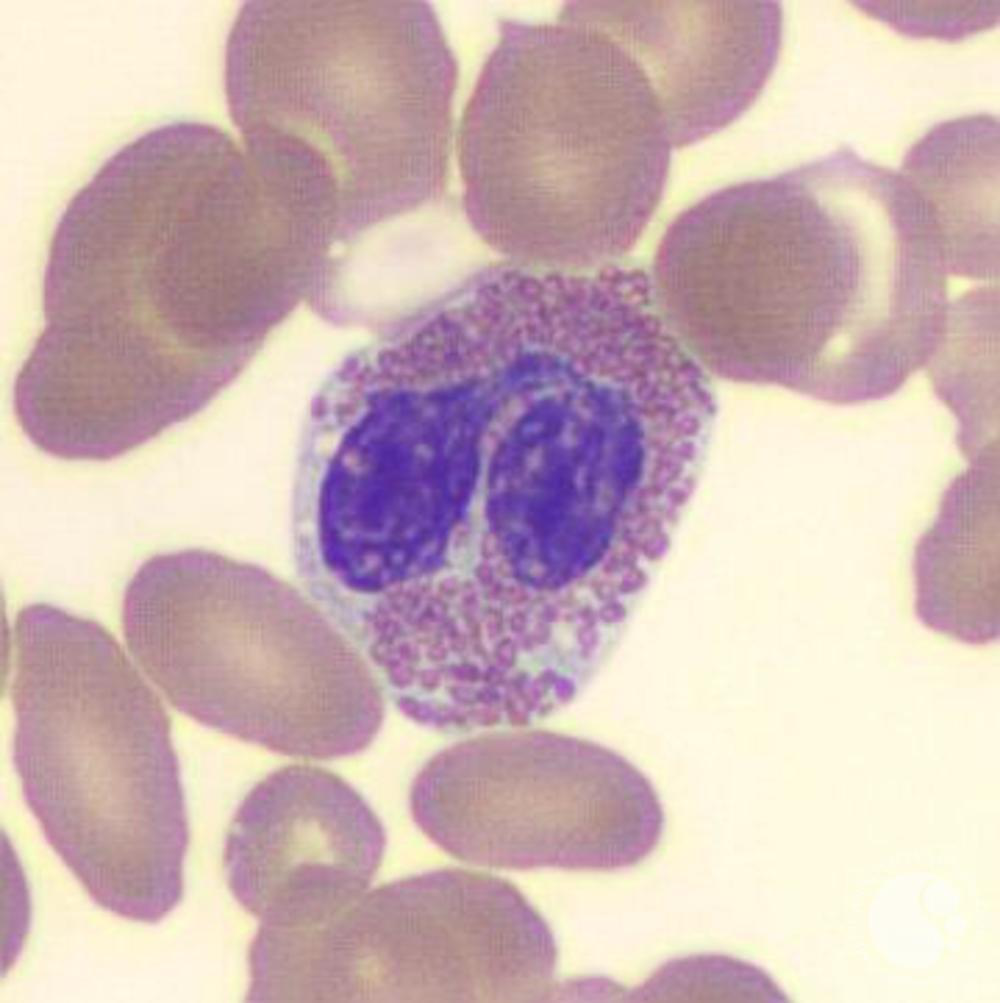

In [28]:
import PIL.Image as image
cell_image = image.open('C:/Users/user pc/Downloads/Esino.jpg')
cell_image

In [29]:
classify(model,our_transforms,'C:/Users/user pc/Downloads/lymph.jpg',classes )

EOSINOPHIL


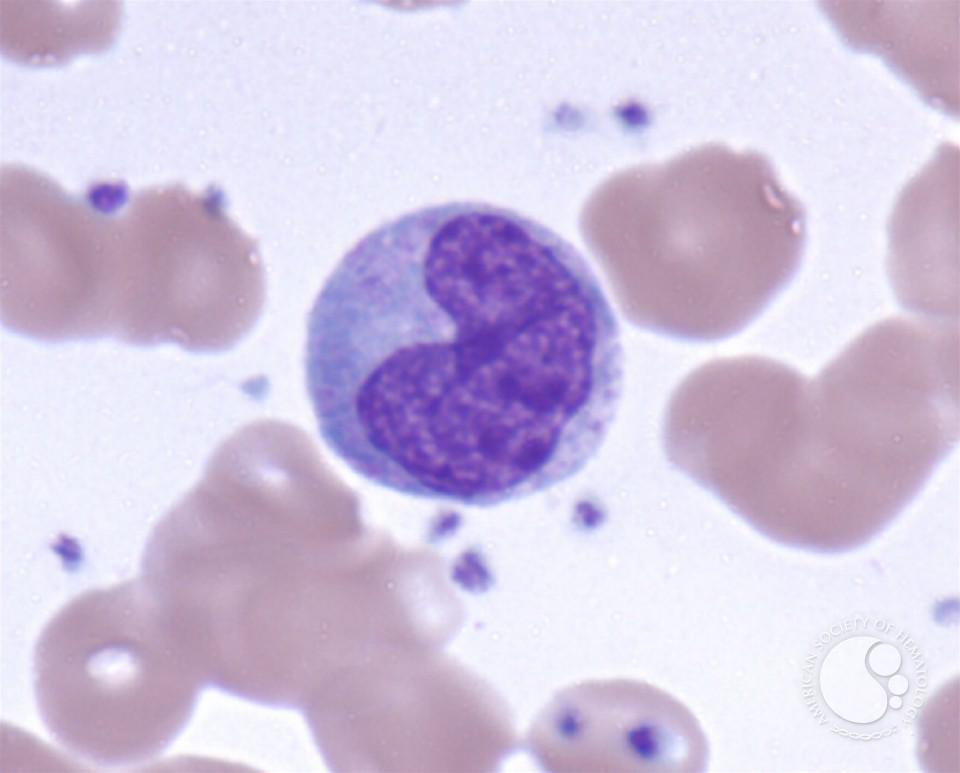

In [30]:
cell_image = image.open('C:/Users/user pc/Downloads/mono.jpg')
cell_image

In [31]:
classify(model,our_transforms,'C:/Users/user pc/Downloads/mono.jpg',classes )

MONOCYTE
